<a href="https://colab.research.google.com/github/DiaHere/Project-7-personal-Data/blob/main/Ronnie_Project_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [ ]:
with open('/content/drive/MyDrive/Spotify Account Data/StreamingHistory_music_0.json', 'r') as file:
    my_data = json.load(file)

# Print the parsed data
print(my_data)

[{'endTime': '2024-04-13 23:48', 'artistName': 'ROSIE', 'trackName': 'Social Stamina', 'msPlayed': 152594}, {'endTime': '2024-04-14 18:24', 'artistName': 'Baby Queen', 'trackName': 'Want Me', 'msPlayed': 258319}, {'endTime': '2024-04-14 18:28', 'artistName': 'CHVRCHES', 'trackName': 'Clearest Blue', 'msPlayed': 233769}, {'endTime': '2024-04-14 19:41', 'artistName': 'Taylor Swift', 'trackName': "Girl At Home (Taylor's Version)", 'msPlayed': 11872}, {'endTime': '2024-04-14 19:43', 'artistName': 'Reneé Rapp', 'trackName': 'Too Well', 'msPlayed': 156631}, {'endTime': '2024-04-14 19:47', 'artistName': 'Taylor Swift', 'trackName': 'I Did Something Bad', 'msPlayed': 7407}, {'endTime': '2024-04-14 19:47', 'artistName': 'Olivia Rodrigo', 'trackName': 'obsessed', 'msPlayed': 3632}, {'endTime': '2024-04-14 19:47', 'artistName': 'Rina Sawayama', 'trackName': 'XS', 'msPlayed': 201060}, {'endTime': '2024-04-14 19:50', 'artistName': 'Shura', 'trackName': "What's It Gonna Be?", 'msPlayed': 214754}, {'

In [ ]:
#puts the data into a data frame
df=pd.DataFrame.from_dict(my_data)
#makes a frame of just timestamps
df_timestamps=df['endTime']
#gets a csv of the timestamps
df['endTime'].to_csv('timestamps.csv')
pd.to_datetime(df['endTime'],utc=True)

,endTime
0,2024-04-13 23:48:00+00:00
1,2024-04-14 18:24:00+00:00
2,2024-04-14 18:28:00+00:00
3,2024-04-14 19:41:00+00:00
4,2024-04-14 19:43:00+00:00
...,...
3059,2025-04-14 21:25:00+00:00
3060,2025-04-14 21:32:00+00:00
3061,2025-04-14 21:34:00+00:00
3062,2025-04-14 21:39:00+00:00


In [ ]:
#reads Csv file and creates data frame
dia_time=pd.read_csv('/content/dia-timestamp.csv')

dia_time=dia_time[['timestamp']]
#converts date into datetime
dia_time['timestamp']=pd.to_datetime(dia_time['timestamp'], format='%Y-%m-%d')
dia_time=dia_time.sort_values(by=['timestamp'],ascending=True)
#creates a diff and month column
dia_time['diff']=dia_time.diff()
dia_time['month']=pd.DatetimeIndex(dia_time['timestamp']).month
dia_time


,timestamp,diff,month
184,2024-01-03,NaT,1
179,2024-09-13,254 days,9
180,2024-09-13,0 days,9
183,2024-09-13,0 days,9
182,2024-09-13,0 days,9
...,...,...,...
4,2025-03-17,0 days,3
3,2025-03-17,0 days,3
2,2025-03-17,0 days,3
1,2025-03-17,0 days,3


In [ ]:
print('the max difference between timestamps is',dia_time['diff'].max()," and the average difference is",dia_time['diff'].mean())

the max difference between timestamps is 254 days 00:00:00  and the average difference is 2 days 09:15:39.130434782


In [ ]:
print(dia_time['timestamp'].value_counts())
print('the day with the most timestamps was September 14th')

timestamp
2024-09-14    13
2024-10-11     9
2024-09-27     8
2025-03-17     8
2024-10-24     6
              ..
2025-01-29     1
2025-03-08     1
2025-02-12     1
2025-02-04     1
2025-03-10     1
Name: count, Length: 71, dtype: int64
the day with the most timestamps was September 14th


In [ ]:
dia_time['month'].value_counts()
print('The month with the most was October with 73 timestamps')

The month with the most was October with 73 timestamps


In [ ]:
day_list=[]
for item in dia_time['timestamp']:
  if item not in day_list:
    day_list.append(item)
len(day_list)

71

In [ ]:
day_dict={}
for day in day_list:
  day_dict[str(day)]=0
for item in dia_time['timestamp']:
   for day in day_list:
       if day==item:
          if day_dict[str(day)]>0:
            day_dict[str(day)]=day_dict[str(day)]+1
          else:
            day_dict[str(day)]=1

value_list=list(day_dict.values())

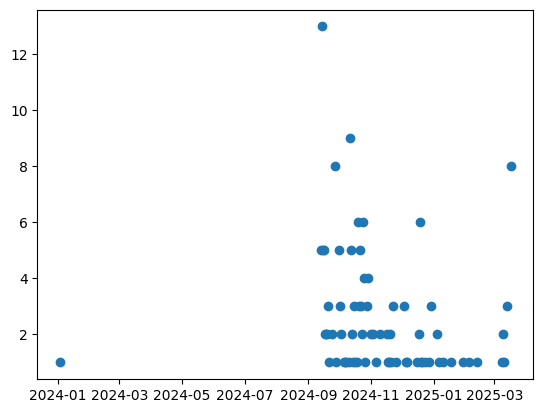

In [ ]:
#plots the number of timestamps per day
plt.scatter(x=day_list,y=value_list)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the data
dia = pd.read_csv('dia-timestamp.csv')

ronnie = pd.read_csv('timestamps.csv')

In [ ]:
# Change timestamp to datetime format
dia['timestamp'] = pd.to_datetime(dia['timestamp'])
dia

,Unnamed: 0,timestamp
0,0,2025-03-17
1,1,2025-03-17
2,2,2025-03-17
3,3,2025-03-17
4,4,2025-03-17
...,...,...
180,180,2024-09-13
181,181,2024-09-13
182,182,2024-09-13
183,183,2024-09-13


In [ ]:
# Change ednTime to datetime format
ronnie['endTime'] = pd.to_datetime(ronnie['endTime'])
ronnie

,Unnamed: 0,endTime
0,0,2024-04-13 23:48:00
1,1,2024-04-14 18:24:00
2,2,2024-04-14 18:28:00
3,3,2024-04-14 19:41:00
4,4,2024-04-14 19:43:00
...,...,...
3059,3059,2025-04-14 21:25:00
3060,3060,2025-04-14 21:32:00
3061,3061,2025-04-14 21:34:00
3062,3062,2025-04-14 21:39:00


In [ ]:
# Create a month column
dia['month'] = dia['timestamp'].dt.to_period('M')
dia = dia.sort_values('timestamp').reset_index()
dia

,index,Unnamed: 0,timestamp,month
0,184,184,2024-01-03,2024-01
1,179,179,2024-09-13,2024-09
2,180,180,2024-09-13,2024-09
3,183,183,2024-09-13,2024-09
4,182,182,2024-09-13,2024-09
...,...,...,...,...
180,4,4,2025-03-17,2025-03
181,3,3,2025-03-17,2025-03
182,2,2,2025-03-17,2025-03
183,1,1,2025-03-17,2025-03


In [ ]:
# time difference between each event
dia['diff'] = dia['timestamp'].diff()
dia

,index,Unnamed: 0,timestamp,month,diff
0,184,184,2024-01-03,2024-01,NaT
1,179,179,2024-09-13,2024-09,254 days
2,180,180,2024-09-13,2024-09,0 days
3,183,183,2024-09-13,2024-09,0 days
4,182,182,2024-09-13,2024-09,0 days
...,...,...,...,...,...
180,4,4,2025-03-17,2025-03,0 days
181,3,3,2025-03-17,2025-03,0 days
182,2,2,2025-03-17,2025-03,0 days
183,1,1,2025-03-17,2025-03,0 days


In [ ]:
# Create a month column
ronnie['month'] = ronnie['endTime'].dt.to_period('M')
ronnie = ronnie.sort_values('endTime')
ronnie

,Unnamed: 0,endTime,month
0,0,2024-04-13 23:48:00,2024-04
1,1,2024-04-14 18:24:00,2024-04
2,2,2024-04-14 18:28:00,2024-04
3,3,2024-04-14 19:41:00,2024-04
4,4,2024-04-14 19:43:00,2024-04
...,...,...,...
3059,3059,2025-04-14 21:25:00,2025-04
3060,3060,2025-04-14 21:32:00,2025-04
3061,3061,2025-04-14 21:34:00,2025-04
3062,3062,2025-04-14 21:39:00,2025-04


In [ ]:
# time difference between each event
ronnie['diff'] = ronnie['endTime'].diff()
ronnie

,Unnamed: 0,endTime,month,diff
0,0,2024-04-13 23:48:00,2024-04,NaT
1,1,2024-04-14 18:24:00,2024-04,0 days 18:36:00
2,2,2024-04-14 18:28:00,2024-04,0 days 00:04:00
3,3,2024-04-14 19:41:00,2024-04,0 days 01:13:00
4,4,2024-04-14 19:43:00,2024-04,0 days 00:02:00
...,...,...,...,...
3059,3059,2025-04-14 21:25:00,2025-04,0 days 00:03:00
3060,3060,2025-04-14 21:32:00,2025-04,0 days 00:07:00
3061,3061,2025-04-14 21:34:00,2025-04,0 days 00:02:00
3062,3062,2025-04-14 21:39:00,2025-04,0 days 00:05:00


**Visualize**

In [ ]:
# Create separate dataframes with month and time difference grouped
dia_month_df = (dia.groupby('month')['diff'].mean().reset_index())
ronnie_month_df = (ronnie.groupby('month')['diff'].mean().reset_index())

# Change the time difference to hours and change the type of month column to a datetime
dia_month_df['diff_hours'] = dia_month_df['diff'].dt.total_seconds() / 3600
dia_month_df['month'] = pd.to_datetime(dia_month_df['month'].astype(str))

ronnie_month_df['diff_hours'] = ronnie_month_df['diff'].dt.total_seconds() / 3600
ronnie_month_df['month'] = pd.to_datetime(ronnie_month_df['month'].astype(str))


In [ ]:
# normalize the dataframes so the visualization is scalled
for df_count in (dia_month_df, ronnie_month_df):
    h = df_count['diff_hours']
    df_count['diff_norm'] = (h - h.min()) / (h.max() - h.min())

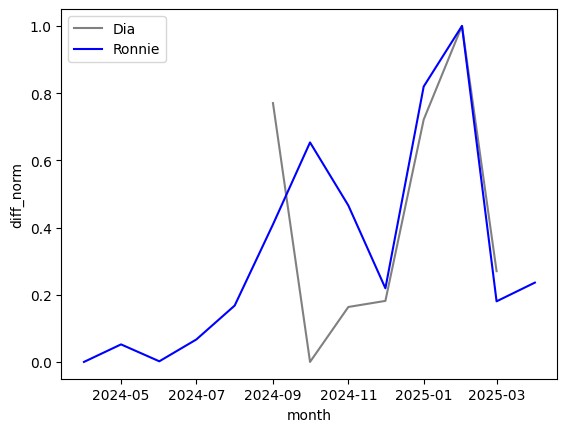

In [ ]:
sns.lineplot(x = 'month', y ='diff_norm', data = dia_month_df, c = 'grey', label = 'Dia')
sns.lineplot(x = 'month', y ='diff_norm', data = ronnie_month_df, c = 'blue', label = 'Ronnie')

plt.legend()
plt.show()

**What do you notice by looking at both partners' data together that you didn't notice looking at the on their own?**

Ronnie noticed that my data was way shorter than his. We surprisingly also noticed that there is a very similair trend during and after December 2024.  

#Part 4

The data that I was analyzing was my Spotify data. The first question the I thought would be interesting to look at was at which hours of the day I listened to the most amount of songs. To do this I converted the time into datetime and isolated the hours of the day I listened to them. Then I aggregated the date by hour and had to convert it from UTC to PST. Based on the graph below I listen to the most amount of music between 8 and 9am which honestly surprised me.

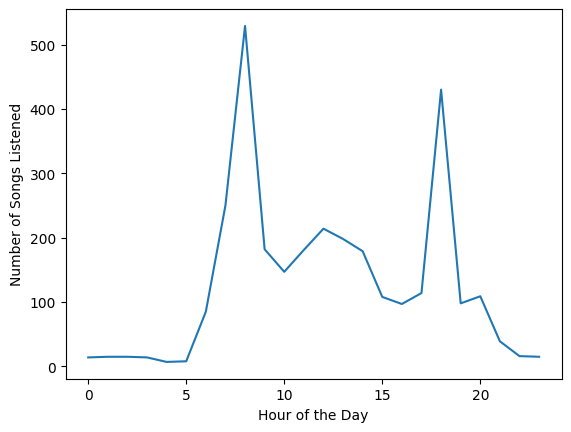

The second question I wanted to ask when looking at the data was which artist I listened to the most. To do this I groupedby artist and summed up the total milliseconds. Then I converted milliseconds to hours and made a bar chart of the data.

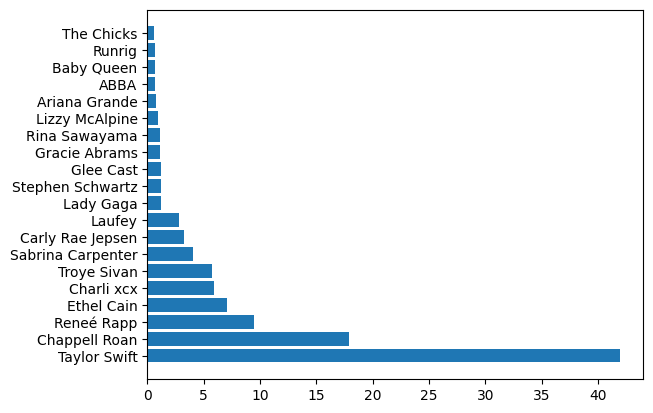